## Name - Nitin Ravat

##  Data Science & Business Analytics

## Task1 - Prediction using Supervised ML(Level Beginner)

## Objective:

In this simple linear regression task we will predict the percentage of scores a student expected to get based on the number of hours they studied . In this simple linear regression task we just use 2 variables. 

In [1]:
# Importing all useful library for this task.
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
# Reading the required data from the link.
link = "http://bit.ly/w-data"
p_data = pd.read_csv(link)
print("Data has been imported")
p_data.head(15)


Data has been imported


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
# Taking information about the data imported. 
p_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
# Counting the type of values in Hours column.
p_data['Hours'].value_counts()

2.5    2
2.7    2
3.8    1
8.5    1
3.5    1
1.5    1
5.5    1
4.5    1
5.9    1
6.1    1
7.7    1
1.9    1
1.1    1
4.8    1
8.3    1
8.9    1
7.4    1
7.8    1
5.1    1
3.2    1
9.2    1
3.3    1
6.9    1
Name: Hours, dtype: int64

In [5]:
# Counting the type of values in Scores column.
p_data['Scores'].value_counts()

30    3
95    1
62    1
85    1
86    1
67    1
24    1
69    1
17    1
41    1
42    1
75    1
47    1
76    1
81    1
20    1
21    1
54    1
88    1
25    1
27    1
60    1
35    1
Name: Scores, dtype: int64

In [6]:
# Full description of the dataset.
p_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Plotting the 2D graph of the dataset for manipulating the relationship between the attributes.

Text(0, 0.5, 'Percentage of Scores')

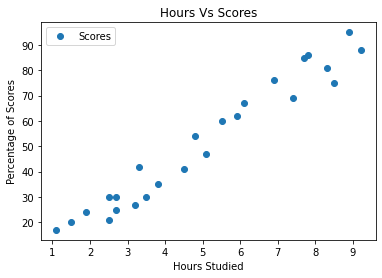

In [7]:
p_data.plot(x='Hours', y='Scores', style = 'o') 
plt.title('Hours Vs Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage of Scores')

In [8]:
# To check whether any data is missing in dataset or not.
p_data.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


## Train Test Split 

In [9]:
Tr = p_data.iloc[:, :-1].values  
Te = p_data.iloc[:, 1].values  


In [10]:
# Splitting the train and test set into features and labels
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test  = train_test_split(Tr, Te, test_size=0.2, random_state=0)

In [11]:
print(" X Train Set:")
print(X_train)
print("Y Train Set:")
print(Y_train)
print("X Test Set:")
print(X_test)
print("Y Test Set:")
print(Y_test)

 X Train Set:
[[3.8]
 [1.9]
 [7.8]
 [6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]]
Y Train Set:
[35 24 86 76 17 47 85 42 81 88 67 30 25 60 30 75 21 54 95 41]
X Test Set:
[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
Y Test Set:
[20 27 69 30 62]


## Training of Algorithm for Prediction(Testing the model on test data)

In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

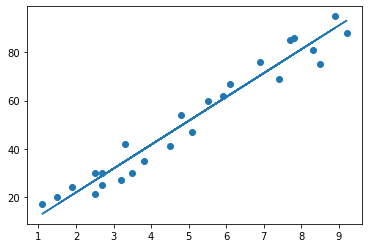

In [13]:
# To observe the regression line for better evaluation
ray = model.coef_*Tr+model.intercept_
plt.scatter(Tr, Te)
plt.plot(Tr, ray);
plt.show()

In [14]:
print(X_test)
pred = model.predict(X_test) # Predicted data

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [15]:
# Comparing predicted and actual value
df = pd.DataFrame({'Real': Y_test, 'Predicted': pred})  
df 

,Real,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [16]:
# Checking the condition at 9.25 hours
hour = 9.25
hours =[[9.25]]
q_pred = model.predict(hours)
print(f"Student will gain score {q_pred[0]} if study for {hour} hours a day")

Student will gain score 93.69173248737538 if study for 9.25 hours a day


## Evaluating The Model to know the performance 

In [17]:
from sklearn.metrics import mean_squared_error
Tr_predictions = model.predict(X_train)
Te_predictions = model.predict(X_test)
mse = mean_squared_error(Y_train, Tr_predictions)
rmse1 = np.sqrt(mse)
mse = mean_squared_error(Y_test, Te_predictions)
rmse2 = np.sqrt(mse)

print('RMSE(Root Mean Squared Error) for train_set:',rmse1)
print('RMSE(Root Mean Squared Error) for test_set:',rmse2)


RMSE(Root Mean Squared Error) for train_set: 5.558613350226342
RMSE(Root Mean Squared Error) for test_set: 4.6474476121003665


In [18]:
from sklearn import metrics  
Tr_predictions = model.predict(X_train)
Te_predictions = model.predict(X_test)
print('MAE(Mean Absolute Error) for train set:', 
      metrics.mean_absolute_error(Y_train, Tr_predictions)) 
print('MAE(Mean Absolute Error) for test set:', 
      metrics.mean_absolute_error(Y_test, Te_predictions)) 

MAE(Mean Absolute Error) for train set: 5.186601709180368
MAE(Mean Absolute Error) for test set: 4.183859899002975
